Simple Linear Regression
-----

**Question 1**  

The scatterplots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lab6_1_q4.png" width="600">  

(a) Describe the relationship between volume and height of these trees.  

The average volume of a tree appears to increase with height, while the volume of a tree increases more strongly with its diameter than with its height.

(b) Describe the relationship between volume and diameter of these trees.  

See above: More strongly related and nearly linear growth of volume with diameter.

(c) Suppose you have height and diameter measurements for another black cherry tree. Which of these variables would be preferable to use to predict the volume of timber in this tree using a simple linear regression model? Explain your reasoning.

Diameter is the better parameter as there appears to be a much stronger correlation, as there is much less scatter in the relation.

**Question 2**  

In `utils.csv` are the average utility bills for homes of a particular size and the average monthly temperature.  

Load the data:

In [14]:
import pandas as pd
df_utils = pd.read_csv('data/utils.csv')
df_utils.columns = df_utils.columns.str.replace(' ', '_')
df_utils.columns = df_utils.columns.str.lower()
df_utils.head()

,month,average_bill,average_monthly_temperature
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69


Make a scatter plot of the data bill by temperature. Which variable would make the most sense as the response variable?

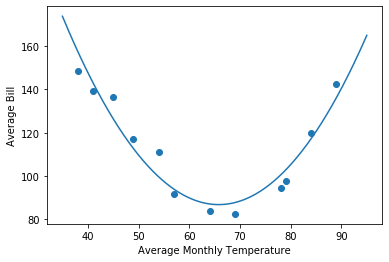

In [108]:
import matplotlib.pyplot as plt
import numpy as np
df_utils.head()
plt.xlabel('Average Monthly Temperature')
plt.ylabel('Average Bill')
plt.scatter(x = df_utils['average_monthly_temperature'], y = df_utils['average_bill']);
#a, b, c, d, e = 484.1076, -12.0760, 0.0918, 0, 0
#a, b, c, d, e = 98.8697, 7.8132, -0.2361, 0.0017, 0
#a, b, c, d, e = results.params[0], results.params[1], results.params[2], results.params[3], 0 * results.params[3] 
#a, b, c = 0, 3.95, -0.032
def func(x): 
    sum = 0
    for idx, a in enumerate(results.params):
        sum += a * x ** idx 
    return sum
    return a + b * x + c * x ** 2 + d * x ** 4# + e * x ** 4
xlist = np.linspace(35, 95, 1000)
funcl = [func(x) for x in xlist]
plt.plot(xlist, funcl);

From visual inspection, what is the relationship between the variables?

In [ ]:
It has a minimum and appears parabolic, in particular for a given bill there may be different temperatures that correspond to it.

Fit a simple linear regression using OLS.  

In [106]:
import statsmodels.api as sms
x = df_utils['average_monthly_temperature'] 
y = df_utils['average_bill']
x = sms.add_constant(x)
x['squared'] = [z ** 2 for z in df_utils['average_monthly_temperature']]
#x['cube'] = [z ** 3 for z in df_utils['average_monthly_temperature']]
#x['four'] = [z ** 4 for z in df_utils['average_monthly_temperature']]
model = sms.OLS(y, x)
results = model.fit()

results.summary()


#results.conf_int_el()
#x.head()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           average_bill   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     51.66
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           1.17e-05
Time:                        15:58:41   Log-Likelihood:                -39.428
No. Observations:                  12   AIC:                             84.86
Df Residuals:                       9   BIC:                             86.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         484.1076     36.956     13.099      0.000     400.507     567.708
average_monthly_temperature   -12.0760      1.233     -9.792      0.000     -14.866      -9.286
squared                         0.0918      0.010      9.454      0.000       0.070       0.114
==============================================================================
Omnibus:                        1.589   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                1.042
Skew:                           0.453   Prob(JB):                        0.594
Kurtosis:                       1.876   Cond. No.                     8.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Calculate and interpret the value of $R^2$.  

0.92 pretty good I guess

Interpret the intercept and slope coefficients in terms a home owner would understand.

The intercept is 484., meaning at an average monthly temperature of 0 °F the monthly utility cost is 484.11\$.
The first slope tells you about the position of minimum i.e. a negative value indicates that the minimum is present for positive temps, while the second slope describes the parabel, i.e. the positive value indicates that the cost of climatization increases at small and large temperatures.

What is the 95% confidence interval for the intercept?  

It gives the range of probable values of the intercept which may still describe the dataset at a 95% level

Is the average monthly temperature a significant predictor of the average utility bill? Why or why not?  

Yes it is, as the utility bill increases due to either large or small temperatures as one needs to heat or cool more.

Use the least squares line to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not? 

<br>

<details><summary>
Click here for a hint…
</summary>
model.predict(…)  
http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/predict.html
</details>

In general, the further the data points one tries to predict are away from the available points the less reliable the extrapolation becomes and in general a certain extrapolation is not possible as other features may play an important role and change the overall behavior.
For example the observed behavior may be only a local behavior and other corrections may only be noticable for larger or smaller temperatures.

In [103]:
func(0)

199.25160675728648

One would expect based on the quadratic model a utility bill of 330\$ for a temperature of 120 °F.